<a href="https://colab.research.google.com/github/Ankitkumar803/Tensorflow/blob/main/W4/Handling_Complex_Images_Happy_or_Sad_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Complex Images - Happy or Sad Dataset

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [4]:
import zipfile
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2022-05-02 21:21:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2022-05-02 21:21:57 (209 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [ ]:
# from tensorflow.keras.preprocessing.image import load_img

# happy_dir = "./data/happy/"
# sad_dir = "./data/sad/"

# print("Sample happy image:")
# plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
# plt.show()

# print("\nSample sad image:")
# plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
# plt.show()

Sample happy image:


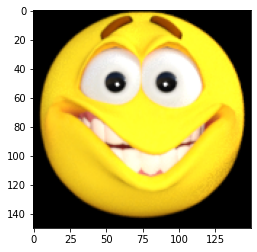


Sample sad image:


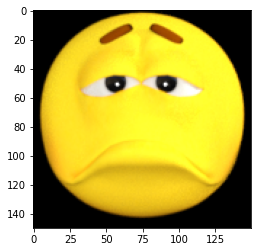

In [5]:
from tensorflow.keras.preprocessing.image import load_img

happy_dir = "/tmp/h-or-s/happy"
sad_dir = "/tmp/h-or-s/sad"

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

# New Section

In [6]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)    #note

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class.
    # Remember to set the rescale argument.
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory='/tmp/h-or-s',
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
    ### END CODE HERE

    return train_generator
    

In [11]:
# Save your generator in a variable
gen = image_generator()

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [12]:
from tensorflow.keras import optimizers, losses

# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

    # Define the model, you can toy around with the architecture.
    # Some helpful tips in case you are stuck:
    
    # - A good first layer would be a Conv2D layer with an input shape that matches 
    #   that of every image in the training set (including the color dimension)

    # - The model will work best with 3 convolutional layers

    # - There should be a Flatten layer in between convolutional and dense layers

    # - The final layer should be a Dense layer with the number of units 
    #   and activation function that supports binary classification.


    model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('sad') and 1 for the other ('happy')
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    from tensorflow.keras.optimizers import RMSprop
    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.001),
                  metrics=['accuracy']) 
    


    # Train the model
    # Your model should achieve the desired accuracy in less than 15 epochs.
    # You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
    # history = model.fit(x=None,
    #                     epochs=None,
    #                     callbacks=[myCallback()]
    #                    ) 
    history = model.fit(
      gen,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,callbacks=[myCallback()])
    
    ### END CODE HERE
    return history

In [13]:
hist = train_happy_sad_model(gen)

Epoch 1/15
8/8 [==============================] - 3s 261ms/step - loss: 3.8279 - accuracy: 0.5250
Epoch 2/15
8/8 [==============================] - 2s 256ms/step - loss: 0.3606 - accuracy: 0.8625
Epoch 3/15
8/8 [==============================] - 2s 256ms/step - loss: 0.3894 - accuracy: 0.8125
Epoch 4/15
8/8 [==============================] - 2s 256ms/step - loss: 0.1503 - accuracy: 0.9250
Epoch 5/15
8/8 [==============================] - 2s 259ms/step - loss: 0.1013 - accuracy: 0.9625
Epoch 6/15
8/8 [==============================] - 2s 258ms/step - loss: 0.1456 - accuracy: 0.9250
Epoch 7/15
8/8 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 2s 259ms/step - loss: 0.0278 - accuracy: 1.0000


In [14]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 7 epochs


In [18]:


model = tf.keras.models.Sequential([ 
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('sad') and 1 for the other ('happy')
tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
# Select a loss function compatible with the last layer of your network
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy']) 



# Train the model
# Your model should achieve the desired accuracy in less than 15 epochs.
# You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
# history = model.fit(x=None,
#                     epochs=None,
#                     callbacks=[myCallback()]
#                    ) 
history = model.fit(
  gen,
  steps_per_epoch=8,  
  epochs=15,
  verbose=1,callbacks=[myCallback()])
    

Epoch 1/15
8/8 [==============================] - 3s 259ms/step - loss: 3.8149 - accuracy: 0.5750
Epoch 2/15
8/8 [==============================] - 2s 264ms/step - loss: 0.5363 - accuracy: 0.7375
Epoch 3/15
8/8 [==============================] - 2s 258ms/step - loss: 0.2656 - accuracy: 0.9000
Epoch 4/15
8/8 [==============================] - 2s 262ms/step - loss: 0.2399 - accuracy: 0.8875
Epoch 5/15
8/8 [==============================] - 2s 261ms/step - loss: 0.1572 - accuracy: 0.9625
Epoch 6/15
8/8 [==============================] - 2s 260ms/step - loss: 0.1987 - accuracy: 0.9375
Epoch 7/15
8/8 [==============================] - 2s 258ms/step - loss: 0.2766 - accuracy: 0.9250
Epoch 8/15
8/8 [==============================] - 2s 260ms/step - loss: 0.0606 - accuracy: 0.9875
Epoch 9/15
8/8 [==============================] - 2s 259ms/step - loss: 0.1202 - accuracy: 0.9375
Epoch 10/15
8/8 [==============================] - 2s 259ms/step - loss: 0.1397 - accuracy: 0.9500
Epoch 11/15
8/8 [==

In [21]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn   # /content is the present directory in google colab
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a happy")
  else:
    print(fn + " is a sad")

Saving Screenshot 2022-05-03 033242.jpg to Screenshot 2022-05-03 033242.jpg
[0.9935208]
Screenshot 2022-05-03 033242.jpg is a happy
